In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import sklearn
sklearn.__version__

import warnings; warnings.filterwarnings('ignore')

# datacamp practice code

## 1. Clustering for dataset exploration

### Unsupervised Learning

#### Clustering 2D points

In [ ]:
xs = points[:, 0]
ys = points[:, 1]
plt.scatter(xs, ys)
plt.show()

# Import KMeans
# from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

#### Inspect your clustering

In [ ]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:, 0]
ys = new_points[:, 1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

### Evaluating a clustering

#### How many clusters of grain?

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### Evaluating the grain clustering

In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

### Transforming features for better clusterings

#### Scaling fish data for clustering

In [21]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

#### Clustering the fish data

In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

#### Clustering stocks using KMeans

In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

#### Which stocks move together?

In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by='labels'))


### 실습1 (x)

In [19]:
# # wine 실습
# wine = pd.read_csv('./wine_data.csv', header=None)
# wine.drop(columns=[0], inplace=True)
# col = ['alcohol','malic_acid','ash','alcalinity','magnesium','total_phenols'
#        ,'flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity'
#        ,'hue','od280','proline']
# wine.columns = col
# print(wine.shape)
# wine.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 실습2

* Edmunds, Amazon, Tripadvisor uci 리뷰 데이터
    * 51개의 .data 확장자 파일 
* (1) 주제별로 군집화
* (2) 문서 유사도

In [108]:
# Module
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from glob import glob
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings; warnings.filterwarnings('ignore')

file_dir = './opinion_data/topics/'
file_titles, contents = [], []

# 파일 제목과 파일 내용을 담고 있는 DataFrame 생성 (df)
# print(glob(os.path.join(file_dir, '*.data'))[0]) # file 포맷 예시 출력
for file in glob(os.path.join(file_dir, '*.data')):
    # 파일 제목
    file_title = file.split('/')[-1].split('.')[0]
    file_titles.append(file_title)
    # 파일 내용
    contents.append(pd.read_table(file, header=0, encoding='latin1'))
    
df = pd.DataFrame({'title':file_titles
                   , 'content':contents})
print(df.shape)
display(df.head())

(51, 2)


,title,content
0,battery-life_ipod_nano_8gb,short battery life I moved up from a...
1,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fa...
2,room_holiday_inn_london,"We arrived at 23,30 hours and they could n..."
3,location_holiday_inn_london,Great location for tube and we crammed in...
4,staff_bestwestern_hotel_sfo,Staff are friendly and hel...


**TF-IDF (Term Frequency-Inverse Document Frequency) 벡터화**
* 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰임
* 카운트 벡터화의 보완
    * 단어 피처에 단어 count를 부여하는 방법
    * 문장에서 자주 사용될 수밖에 없는 단어들에도 높은 가중치가 부여되는 단점
* TF * IDF
    * 자주 나타나는 단어에 높은 가중치를 줌 & 모든 문서에서 높은 빈도로 나타나는 단어에 패널티 부여
        * ex) 당연히-와 같은 불용어
    * TF-IDF 값이 크면 중요도가 높고, 낮으면 중요도가 적은 단어
    * TF (Term Frequency) : 개별 문서에서의 단어 i 빈도
    * DF (Document Frequency) : 단어 i가 등장한 문서의 개수
    * IDF (Inverse Document Frequency) : DF의 역수 

![tf-idf](tf-idf.png)

In [130]:
# from nltk.tokenize import word_tokenize
# from nltk.tokenize import WordPunctTokenizer
import string
# from nltk.stem import WordNetLemmatizer

from tensorflow.keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence('ABCD3.33!!2ss^^!ait')

2022-09-21 21:14:54.561433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


['abcd3', '33', '2ss', 'ait']

In [131]:
# 소문자 (lower_content)
def content_lower(row):
    li = []
    for i in row:
        for j in i:
            li.append(j.lower())
    return li

df['lower_content'] = content_lower(df['content'])

# 특수문자 제거 (del_punc)
del_punc = dict((ord(punc), None) for punc in string.punctuation)  # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' 를 아스키 코드로 변환 후 None


# 표제어 추출을 위한 Lemmatization 커스텀 코드 작업
# Lemmatization : am, are, is의 뿌리 단어 = be

import nltk
# nltk.download('omw-1.4')
# nltk.download('wordnet')
# nltk.download('punkt')
# dler = nltk.downloader.Downloader()
# dler._update_index()
# dler.download('all')


import string
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def token(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

def LemNormalizer(text):
    return token(text_to_word_sequence(text))

# TF-IDF 벡터화
tfidf = TfidfVectorizer(tokenizer=LemNormalizer,
                       stop_words='english',
                       ngram_range=(1, 2), 
                       min_df=0.05, max_df=0.90) # min_df : 전체 documents에서 너무 낮은 빈도의 단어 피처는 제외 (하위 5% 이하의 빈도수를 지닌 단어는 제외)
                                                 # max_df : 전체 documents에서 너무 높은 빈도의 단어 피처는 제외 (0%~90% 의 빈도수를 지닌 단어만 포함, 상위 10% 빈도수의 단어는 제외)
                                                 # ngram_range : 단어 묶음 1~2개로 설정 (단어가 여러 개 묶여야 의미를 갖는 단어들이 있으므로)
# fit_transform content (피처 벡터화된 matrix)
vect = tfidf.fit_transform(df['lower_content'])
vect

<51x27 sparse matrix of type '<class 'numpy.float64'>'
	with 106 stored elements in Compressed Sparse Row format>

In [132]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

df['cluster'] = cluster_label
df.sort_values(by='cluster')
print(df.cluster.value_counts())

0    32
2    12
1     7
Name: cluster, dtype: int64


In [133]:
df.loc[df['cluster']==2]

,title,content,lower_content,cluster
2,room_holiday_inn_london,"We arrived at 23,30 hours and they could n...","we arrived at 23,30 hours and they could not r...",2
3,location_holiday_inn_london,Great location for tube and we crammed in...,great location for tube and we crammed in a f...,2
12,keyboard_netbook_1005ha,", I think the new keyboard rivals the gre...",", i think the new keyboard rivals the great h...",2
14,video_ipod_nano_8gb,"I bought the 8, gig Ipod Nano that has the...","i bought the 8, gig ipod nano that has the bui...",2
20,staff_swissotel_chicago,The staff at Swissotel were not particula...,the staff at swissotel were not particularly ...,2
22,interior_toyota_camry_2007,"First of all, the interior has way too ma...","first of all, the interior has way too many c...",2
23,transmission_toyota_camry_2007,"After slowing down, transmission has to b...","after slowing down, transmission has to be k...",2
28,price_holiday_inn_london,"All in all, a normal chain hotel on a nice...","all in all, a normal chain hotel on a nice loc...",2
38,navigation_amazon_kindle,"In fact, the entire navigation structure h...","in fact, the entire navigation structure has ...",2
46,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , Helpless...","great location , nice rooms , helpless con...",2


In [134]:
# cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2
label2_indexes = df[df['cluster']==2].index
print('2로 클러스터링 된 문서들의 DF Index:', label2_indexes)

# 첫번째 문서를 추출하여 파일명 표시
comparison_doc = df.iloc[label2_indexes[0]]['title']
print('\n비교 기준 문서명 ', comparison_doc+'과 타 문서 유사도')

'''df에서 추출한 Index 객체를 vect로 입력하여 클러스터링된 vect 추출 
이를 이용하여 cluster=2로 클러스터링된 문서 중 첫 번째 문서와 다른 문서간의 코사인 유사도 측정'''
similarity_cluster2 = cosine_similarity(vect[label2_indexes[0]] , vect[label2_indexes])
print(similarity_cluster2)

2로 클러스터링 된 문서들의 DF Index: Int64Index([2, 3, 12, 14, 20, 22, 23, 28, 38, 46, 47, 49], dtype='int64')

비교 기준 문서명  room_holiday_inn_london과 타 문서 유사도
[[1.         0.         0.         0.         0.72291615 0.
  0.         0.32167346 0.         0.51391196 0.3436457  0.43799056]]


Text(0.5, 1.0, 'room_holiday_inn_london')

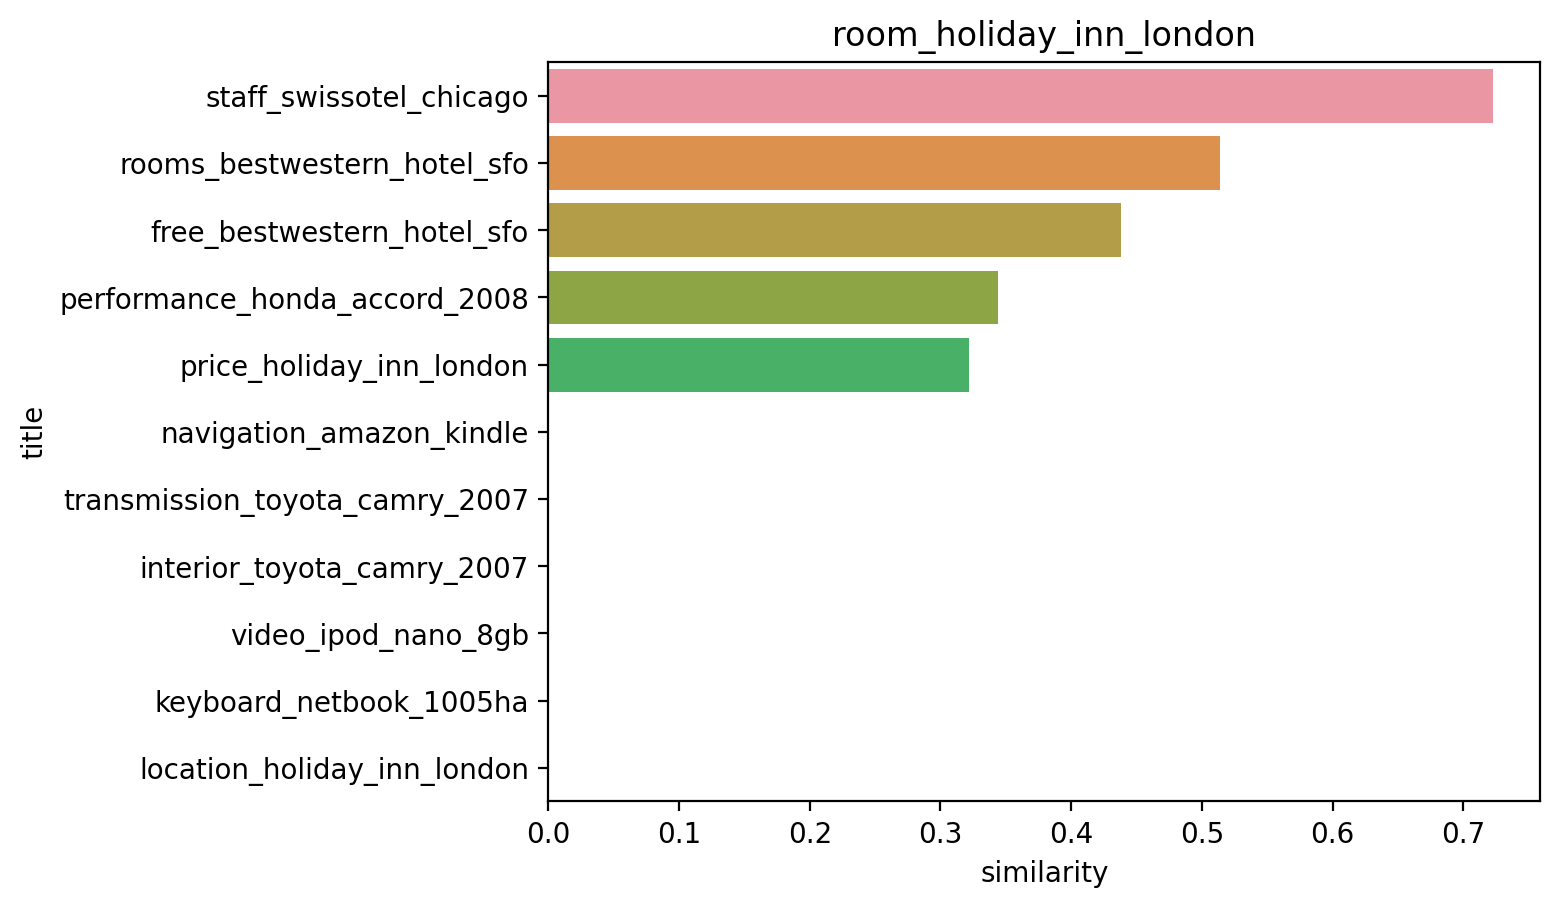

In [135]:
# argsort()를 이용, 첫 번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환 (자기 자신 제외) 
sorted_index = similarity_cluster2.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 index를 추출하여 다시 정렬 
re_sorted_indexes = label2_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
cluster2_sim_value = np.sort(similarity_cluster2.reshape(-1))[::-1]
cluster2_sim_value = cluster2_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
cluster2_sim_df = pd.DataFrame()
cluster2_sim_df['title'] = df.iloc[re_sorted_indexes]['title']
cluster2_sim_df['similarity'] = cluster2_sim_value

sns.barplot(x='similarity', y='title',data=cluster2_sim_df)
plt.title(comparison_doc)

## 2. Visualization with hierarchical clustering and t-SNE

### Visualizing hierarchies

#### Hierarchical clustering of the grain data

In [ ]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

#### Hierarchies of stocks

In [25]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

### Cluster labels in hierarchical clustering

#### Which clusters are closest?

![linkage cluster](cluster_linkage_riddle.png)

In the video, you learned that the linkage method defines how the distnace between clusters is measured.  
In complete linkage, the distance between clusters is the distance between the furthest points of the clusters.  
In single linkage, the distance between clusters is the distance between the closest points of the clusters.  
Consider the three clusters in the diagram. Which of the following statements are true?  
* In single linkage, Cluster 3 is the closest cluster to Cluster 2. -> True  
* In complete linkage, Cluster 1 is the closest cluster to Cluster 2. -> True

#### Different linkage, different hierarchical clustering!

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()


#### Intermediate clusterings

![linkage cluster](intermediate_clusterings.svg)

Displayed on the right is the dendrogram for the hierarchical clustering of the grain samples that you computed earlier.  
if the hierarchical clustering were stopped at height 6 on the dendrogram, how many clusters would there be?
* 3

#### Extracting the cluster labels

In [ ]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

### t-SNE for 2-dimensional maps

* t-SNE = t-Distributed Stochastic Neighbor Embedding. 
* 훈련 데이터를 새로운 표현으로 변환, 새로운 데이터에는 적용하지 못함(훈련했던 데이터만 변환 가능)
* 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것. 각 데이터 포인트를 2차원에 무작위로 표현한 후 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀어지게 만들고, 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둠
* 즉, 이웃 데이터 포인트에 대한 정보를 보존하려 노력
* fit_transform만 있음

#### t-SNE visualization of grain dataset

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

![img](t-SNE_visualization_of_grain_dataset.svg)

#### A t-SNE map of the stock market

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1th feature: ys
ys = tsne_features[:, 1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

![img](t-SNE_map_of_the_stock_market.svg)

### 실습

(26, 2)


,Countries,Total
0,Portugal,758
1,Bulgaria,615
2,Moldova,374
3,Belgium,363
4,Sweden,344


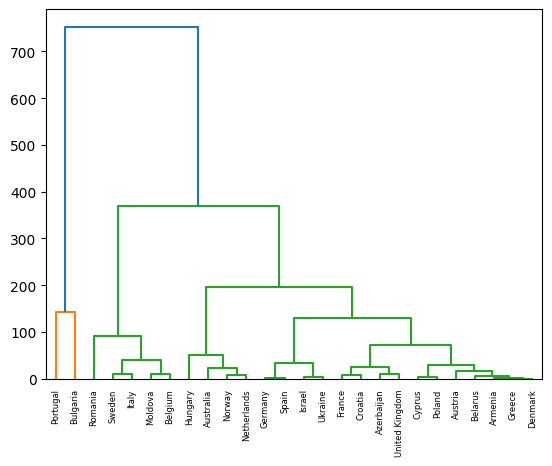

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram

song = pd.read_csv('song_contest.csv')
print(song.shape)
display(song.head())
x = np.array(song['Countries'])
y = np.array(song['Total'])
mergings = linkage(np.reshape(y, (len(y), 1)), method='complete')
dendrogram(mergings
           , labels=x
           , leaf_rotation=90
           , leaf_font_size=6)
plt.show()

## 3. Decorrelating your data and dimension reduction

* Principal component analysis
    * 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시킴
    * 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택

![img1](2d_pca.png)

* 그림1

![img2](3d_pca.png)

* 그림2

여기서 주성분이라 함은 그 방향으로 데이터들의 분산이 가장 큰 방향벡터를 의미한다.   
<그림 1>에서 e1 방향을 따라 데이터들의 분산(흩어진 정도)이 가장 크다. 그리고 e1에 수직이면서 그 다음으로 데이터들의 분산이 가장 큰 방향은 e2이다.  

PCA는 2차원 데이터 집합에 대해 PCA를 수행하면 2개의 서로 수직인 주성분 벡터를 반환하고, 3차원 점들에 대해 PCA를 수행하면 3개의 서로 수직인 주성분 벡터들을 반환한다.   
예를 들어 3차원 데이터의 경우는 아래 그림과 같이 3개의 서로 수직인 주성분 벡터를 찾아준다.

### Visualizing the PCA transformation

#### Correlated data in nature

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

![img](correlated_data_in_nature.svg)

#### Decorrelating the grain measurements with PCA

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

![img](decorrelating_the_grain_measuerments_with_pca.svg)

#### Principal components

![i](principal_components.svg)

On the right are three scatter plots of the same point cloud. Each scatter plot shows a different set of axes (in red). In which of the plots could the axes represent the principal components of the point cloud?

Recall that the principal components are the directions along which the the data varies.

* The answer is **both plot 1 and plot 3.**

### Intrinsic dimension

#### The first pricinpal component

In [ ]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

![img](first_principal_compo.svg)

#### Variance of the PCA features

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

![img](var_pca_feature.svg)

#### Intrinsic dimension of the fish data

![g](intrinsic.svg)

In the previous exercise, you plotted the variance of the PCA features of the fish measurements.   
Looking again at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the fish measurements?  
Recall that the intrinsic dimension is the number of PCA features with significant variance.
* Answer: 2

### Dimension reduction with PCA

#### Dimension reduction of the fish measurements

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


#### A tf-idf word-frequency array

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


#### Clustering Wikipedia part 1

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


#### Clustering Wikipedia part 2

In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values(by='label'))


### 실습

## 4. Discovering interpretable features

### Non-negative matrix factorization (NMF)

* 비음수 행렬 분해
* PCA와 달리 해석 가능
* 샘플 특성이 0보다 같거나 커야 함

#### Non-negative data

Which of the following 2-dimensional arrays are examples of non-negative data?  
  
1. A tf-idf word-frequency array.  
2. An array daily stock market price movements (up and down), where each row represents a company.  
3. An array where rows are customers, columns are products and entries are 0 or 1, indicating whether a customer has purchased a product.  
  
* The answer is 1 and 3

#### NMF applied to Wikipedia articles

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))


#### NMF features of the Wikipedia articles

In [ ]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(index=titles, data=nmf_features)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])


### NMF learns interpretable parts

#### NMF learns topics of documents

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(data=model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


#### Explore the LED digits dataset

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13, 8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

![img](led_digits_dataset.svg)

#### NMF learns the parts of images

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

![g](nmf_learns_the_parts_of_img.svg)

#### PCA doesn't learn parts

In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

![a](pca_doesnt_learn_parts.svg)

### Building recommender systems using NMF

#### Which articles are similar to 'Cristiano Ronalodo'?

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(data=norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

#### Recommend musical artists part 1

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


#### Recommend musical artists part 2

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(data=norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


### 실습